In [13]:
import plotly.graph_objs as go
import kaleido
import matplotlib.pyplot as plt

In [14]:
nodes = dict(pad=15,
             thickness=20,
             line=dict(color="black", width=0.5),
             label=["Theoretical (26)", "Experimental (9)", "Balanced (44)",
                    "None (3)","Theoretical (29)", "Experimental (15)", "Balanced (28)", "None (10)"], 
              x = [0.001, 0.001, 0.001, 0.001, 0.999, 0.999, 0.999, 0.999],
              y = [0.001, 75/285, 160/285, 190/285, 0.001, 75/285, 130/285, 215/285], 
              color=["#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51","#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51"])

In [15]:
links = dict(source=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3],
             target=[4,5,6,7,4,5,6,7,4,5,6,7,4,5,6,7],
             value =[9,3,10,4,3,1,5,0,16,11,12,5,1,0,1,1],
             color=["#ACBAAD", "#ACBAAD", "#ACBAAD", "#ACBAAD",
             "#D0B49F", "#D0B49F", "#D0B49F", "#D0B49F", 
             "#9DB6CC", "#9DB6CC", "#9DB6CC", "#9DB6CC", "#ab6b51", "#ab6b51","#ab6b51","#ab6b51"])

In [16]:
layout = dict(font=dict(size=14),
              width=470,
              height=500,
              margin=dict(l=50, r=50, b=50, t=50),
              paper_bgcolor="white",
              plot_bgcolor="white")

In [17]:
# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(arrangement = 'snap', node=nodes, link=links)],
                 layout=layout)


fig.update_traces(textfont=dict(color='black'))
fig.write_image('outputs/sankey/ReasoningLevel.png', scale = 10)

#Show the diagram
fig.show()

## Argument Level

In [18]:
# Define the nodes and links of the diagram
nodes1 = dict(pad=15,thickness=20,
             line=dict(color="black", width=0.5),
             label=["Y1-Superficial (34)", "Y1-Extended (24)", "Y1-Deep (14)", 
                    "Y1-Prediction (2)", "Y1-Expert (8)", "Y2-Superficial (28)",
                     "Y2-Extended (25)", "Y2-Deep (15)", "Y2-Prediction (6)", "Y1-Expert (8)"],
             x = [0.001, 0.001, 0.001, 0.001, 0.001, 0.999, 0.999, 0.999, 0.999, 0.999],
             y = [0.001, 75/285, 160/285, 190/285, 210/285, 0.001, 75/285, 130/285, 215/285, 250/285], 
              color=["#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51", "#B7A1A6","#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51", "#B7A1A6"])

In [19]:
links1 = dict(source=[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,],
             target=[5,6,7,8,9,5,6,7,8,9,5,6,7,8,9, 5,6,7,8,9, 5,6,7,8,9,],
             value=[12,9,6,2,5,9,9,4,2,0,4,7,2,1,0,0,0,1,0,1,3,0,2,1,2,],
             color=["#ACBAAD", "#ACBAAD", "#ACBAAD", "#ACBAAD","#ACBAAD","#D0B49F",
                     "#D0B49F", "#D0B49F", "#D0B49F", "#D0B49F", "#9DB6CC",
                     "#9DB6CC", "#9DB6CC", "#9DB6CC", "#9DB6CC", "#ab6b51",
                     "#ab6b51","#ab6b51","#ab6b51", "#ab6b51","#B7A1A6",
                       "#B7A1A6","#B7A1A6","#B7A1A6", "#B7A1A6"])

In [20]:
# # Define the layout of the diagram
layout = dict(font=dict(size=14),
              width=470,
              height=500,
              margin=dict(l=50, r=50, b=50, t=50),
              paper_bgcolor="white",plot_bgcolor="white")



# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(arrangement = 'snap', node=nodes1, link=links1)], layout=layout)
fig.update_traces(textfont=dict(color='black'))
fig.write_image('outputs/sankey/ArgumentLevel.png', scale = 10)
# Show the diagram
fig.show()

HeatMap

In [171]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [172]:
csv_path_y1 = 'outputs/LDA_weights_grades_df_year1.csv'
csv_path_y2 = 'outputs/LDA_weights_grades_df_year2.csv'
df_y1 = pd.read_csv(csv_path_y1)
df_y2 = pd.read_csv(csv_path_y2)
df.head()

,Unnamed: 0,StudentID,Content,ArgumentLevel,ReasoningLevel,GS percent,0,1
7,7,GS_TGO908_Redacted,10 900 000 ± 232 000 m-1 chemical element emit...,superficial,bal,81.0,0.842769,0.157231
13,13,GS_LZH215_Redacted,abstract-the main aim of this experiment be to...,deep,the,84.0,0.196724,0.803276
74,74,GS_WHP087_Redacted,this experiment be conduct to determine the ry...,superficial,bal,80.0,0.072881,0.927119
77,77,GS_TFY667_Redacted,this project investigates the measurement of w...,deep,exp,84.0,0.809065,0.190935


# YEAR1 Topic Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


84.0 44.0


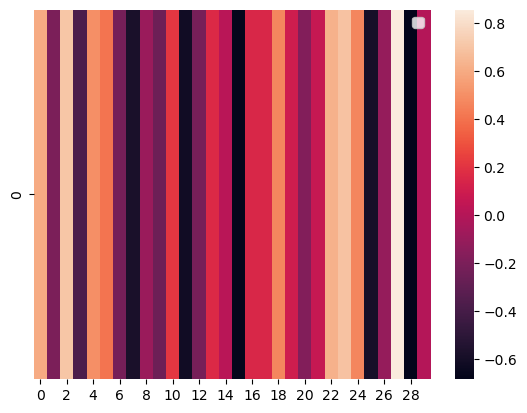

In [103]:
# find min and max grades
max_grade = max(df_y1['GS percent']) 
min_grade = min(df_y1['GS percent'])
print(max_grade, min_grade) # 决定采用区间 45 - 85, step size 1 

# merge grades
list_grade = set(sorted(df_y1['GS percent']))
# print(list_grade)


heatmap_x = []
heatmap_y_topic0 = []
heatmap_y_topic1 = []
heatmap_y_sum = []
for grade in list_grade: # individual weights
    
    heatmap_x.append(grade) #heatmap x
    
    df = df_y1.loc[df_y1['GS percent'] == grade] # reports that has the grade required
    row_number = len(df.index)# number of reports
    topic_zero_weight = df['0'].sum() 
    topic_one_weight = df['1'].sum()
    
    heatmap_y_topic0.append(topic_zero_weight/row_number) # heatmap y - topic0
    heatmap_y_topic1.append(topic_one_weight/row_number)  # heatmap y - topic1
    heatmap_y_sum.append( (topic_zero_weight*(-1)+topic_one_weight)/ row_number ) # heatmap y - both topics
    

fig, ax = plt.subplots()
seaborn.heatmap([heatmap_y_sum])

# plt.scatter(heatmap_x,heatmap_y_topic0, label = 'topic0')
# plt.scatter(heatmap_x,heatmap_y_topic1, label = 'topic1')
# plt.scatter(heatmap_x,heatmap_y_sum, label = 'both')
plt.legend()




In [176]:
range_grade = np.arange(45, 90, 5) # [45 50 55 60 65 70 75 80 85]

heatmap_x = []
heatmap_y_topic0 = []
heatmap_y_topic1 = []
heatmap_y_sum = []

for i, grade in enumerate(range_grade): # combined weights
    if i == 8:
        break
    heatmap_x.append( np.sum(range_grade[i] + range_grade[i+1])/2 ) #heatmap x
    
    df = df_y1.loc[(df_y1['GS percent'] >= range_grade[i]) & (df_y1['GS percent'] < range_grade[i+1])] # reports that has the grade required
    
    row_number = len(df.index)# number of reports
    topic_zero_weight = df['0'].sum() 
    topic_one_weight = df['1'].sum()
    
    heatmap_y_topic0.append(topic_zero_weight/row_number) # heatmap y - topic0
    heatmap_y_topic1.append(topic_one_weight/row_number)  # heatmap y - topic1
    heatmap_y_sum.append( (topic_zero_weight*(-1)+topic_one_weight)/ row_number ) # heatmap y - both topics
    

    
fig, ax = plt.subplots()
y_axis_labels = ['Topic 0', 'Topic 1', 'Topic 0 & 1']
xticklabels = ['45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85']
svm = seaborn.heatmap([heatmap_y_topic0,heatmap_y_topic1, heatmap_y_sum], yticklabels=y_axis_labels, xticklabels = xticklabels)
plt.yticks(rotation=0) 

figure = svm.get_figure()    
figure.savefig('figures/heatmap/Year1-heatmap.png', dpi=600, bbox_inches = 'tight')


RuntimeError: latex was not able to process the following string:
b'Topic 0 & 1'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpzgb_3x99 e12189cee3db652f33dbea7b608bf52b.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./e12189cee3db652f33dbea7b608bf52b.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file e12189cee3db652f33dbea7b608bf52b.aux.
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.30 {\rmfamily Topic 0 &
                          1}%
No pages of output.
Transcript written on tmpzgb_3x99/e12189cee3db652f33dbea7b608bf52b.log.




RuntimeError: latex was not able to process the following string:
b'Topic 0 & 1'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpx35qxh6m e12189cee3db652f33dbea7b608bf52b.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./e12189cee3db652f33dbea7b608bf52b.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file e12189cee3db652f33dbea7b608bf52b.aux.
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.30 {\rmfamily Topic 0 &
                          1}%
No pages of output.
Transcript written on tmpx35qxh6m/e12189cee3db652f33dbea7b608bf52b.log.




<Figure size 1980x1500 with 2 Axes>

# Year 2 Topic Analysis

In [175]:
range_grade = np.arange(40, 85, 5) 

heatmap_x = []
heatmap_y_topic0 = []
heatmap_y_topic1 = []
heatmap_y_sum = []

for i, grade in enumerate(range_grade): # combined weights
    if i == 8:
        break
    heatmap_x.append( np.sum(range_grade[i] + range_grade[i+1])/2 ) #heatmap x
    
    df = df_y2.loc[(df_y2['Interferometry percent'] >= range_grade[i]) & (df_y2['Interferometry percent'] <= range_grade[i+1])] # reports that has the grade required
    
    row_number = len(df.index)# number of reports
    topic_zero_weight = df['0'].sum() 
    topic_one_weight = df['1'].sum()
    
    heatmap_y_topic0.append(topic_zero_weight/row_number) # heatmap y - topic0
    heatmap_y_topic1.append(topic_one_weight/row_number)  # heatmap y - topic1
    heatmap_y_sum.append( (topic_zero_weight*(-1)+topic_one_weight)/ row_number ) # heatmap y - both topics
    

fig, ax = plt.subplots()
y_axis_labels = ['Topic 0', 'Topic 1', 'Topic 0 & 1']
xticklabels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']
svm = seaborn.heatmap([heatmap_y_topic0,heatmap_y_topic1, heatmap_y_sum], yticklabels=y_axis_labels, xticklabels = xticklabels)
plt.yticks(rotation=0) 

figure = svm.get_figure()    
figure.savefig('figures/heatmap/Year2-heatmap.png', dpi=600, bbox_inches = 'tight')

RuntimeError: latex was not able to process the following string:
b'Topic 0 & 1'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpqnzaolij e12189cee3db652f33dbea7b608bf52b.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./e12189cee3db652f33dbea7b608bf52b.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file e12189cee3db652f33dbea7b608bf52b.aux.
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.30 {\rmfamily Topic 0 &
                          1}%
No pages of output.
Transcript written on tmpqnzaolij/e12189cee3db652f33dbea7b608bf52b.log.




RuntimeError: latex was not able to process the following string:
b'Topic 0 & 1'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpzg9dekb1 e12189cee3db652f33dbea7b608bf52b.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./e12189cee3db652f33dbea7b608bf52b.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/local/texlive/2019/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file e12189cee3db652f33dbea7b608bf52b.aux.
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/local/texlive/2019/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.30 {\rmfamily Topic 0 &
                          1}%
No pages of output.
Transcript written on tmpzg9dekb1/e12189cee3db652f33dbea7b608bf52b.log.




<Figure size 1980x1500 with 2 Axes>